<a href="https://colab.research.google.com/github/MofokengTT21/ml-decision-tree-reg/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Data Source

In [14]:
data = pd.read_csv ("https://gist.githubusercontent.com/inoccu/139294a0476751fbfd1cde4110edbbab/raw/eb2d487390a1d0ca29d2c0f3fef947a2a3505382/housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [16]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


# Data Visualisation

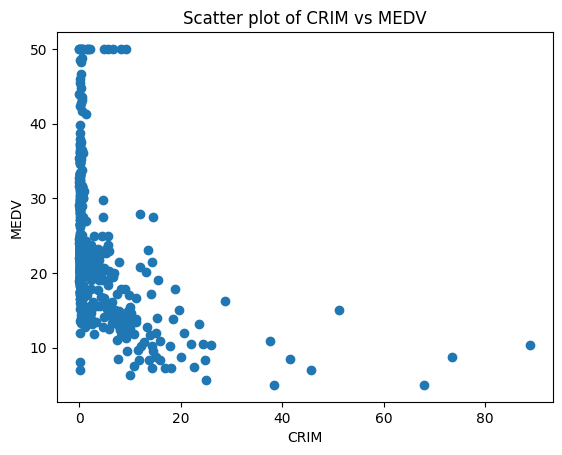

In [17]:
# Scatter plot of CRIM vs MEDV
plt.scatter(data['CRIM'], data['MEDV'])
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.title('Scatter plot of CRIM vs MEDV')
plt.show()


This plot shows the relationship between the crime rate (CRIM) and the median value of owner-occupied homes (MEDV). There appears to be a positive correlation between these two variables, meaning that areas with higher crime rates tend to have higher median home values.


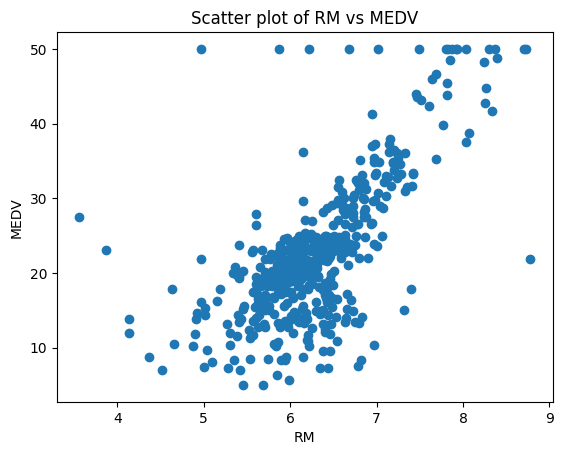

In [18]:
# Scatter plot of RM vs MEDV
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Scatter plot of RM vs MEDV')
plt.show()

This plot shows the relationship between the average number of rooms per dwelling (RM) and the median value of owner-occupied homes (MEDV). There appears to be a positive correlation between these two variables, meaning that homes with more rooms tend to have higher median values.


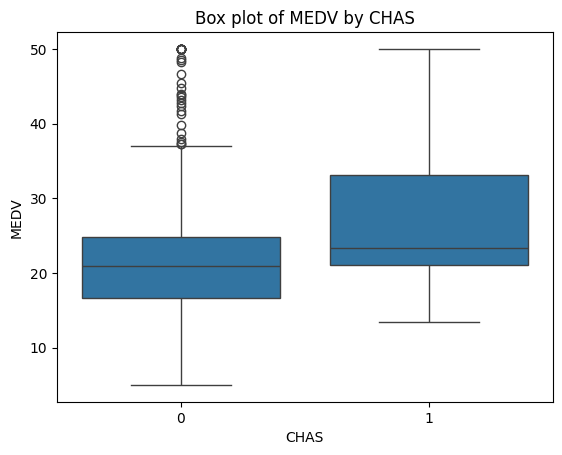

In [19]:
# Box plot of MEDV by CHAS
sns.boxplot(x='CHAS', y='MEDV', data=data)
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.title('Box plot of MEDV by CHAS')
plt.show()

 This plot shows the distribution of median home values (MEDV) for houses with and without the Charles River (CHAS). The box plot shows that houses with the Charles River tend to have higher median values than houses without the Charles River.


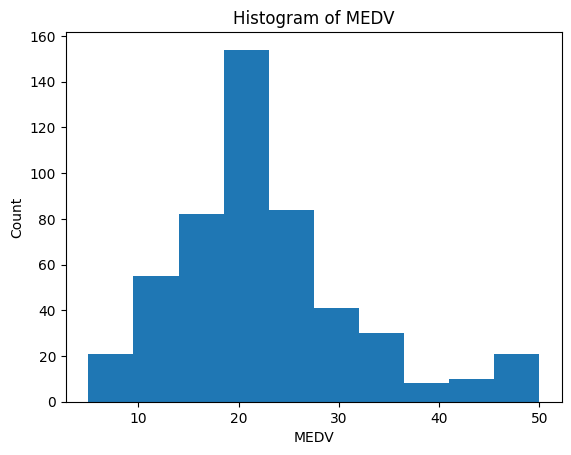

In [20]:
# Histogram of MEDV
plt.hist(data['MEDV'], bins=10)
plt.xlabel('MEDV')
plt.ylabel('Count')
plt.title('Histogram of MEDV')
plt.show()

This plot shows the distribution of median home values (MEDV) in the dataset. The histogram shows that the data is skewed to the right, meaning that there are more houses with lower median values than houses with higher median values.


# Split data into training and Test dataset

In [21]:
feature_cols = ['LSTAT', 'INDUS', 'PTRATIO', 'NOX','RM','AGE', 'DIS', 'RAD', 'TAX']
x = data[feature_cols]
y = data['MEDV']

In [22]:
# Split data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state =1)

In [23]:
print(x_train.shape, x_test.shape)

(339, 9) (167, 9)


# Standardize the input Data

In [24]:
print("Null values in x_train:")
print(np.isnan(x_train).sum())
print("Null values in x_test:")
print(np.isnan(x_test).sum())

Null values in x_train:
LSTAT      0
INDUS      0
PTRATIO    0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
dtype: int64
Null values in x_test:
LSTAT      0
INDUS      0
PTRATIO    0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
dtype: int64


**Preprocessing**

In [25]:
# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on x_train
x_train = imputer.fit_transform(x_train)

# Transform x_test 
x_test = imputer.transform(x_test)

print("Null values in x_train:")
print(np.isnan(x_train).sum())
print("Null values in x_test:")
print(np.isnan(x_test).sum())

Null values in x_train:
0
Null values in x_test:
0


In [26]:
# all parameters not specified are set to their defaults
model_DR = DecisionTreeRegressor()
model_DR.fit(x_train, y_train)

DecisionTreeRegressor()

# Model Evaluation

In [27]:
# Predicted Output
y_pred = model_DR.predict(x_test)

# Performance Evaluation

In [28]:
# Model accuracy, how often is the classifier correct?

# Calculate the RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Root Mean Squared Error (RMSE): %.3f' % rmse)
print('Mean Absolute Error: %.3f' % mae)
print('R^2 Score: %.3f' % r2)


Root Mean Squared Error (RMSE): 3.721
Mean Absolute Error: 2.733
R^2 Score: 0.843


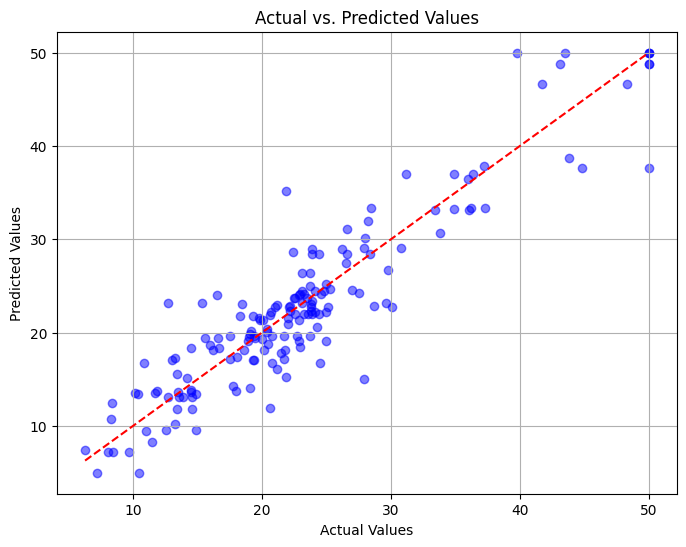

In [29]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()



The plot shows that the model generally performs well, with most of the points clustered around the diagonal line. This indicates that the model is able to accurately predict the median value of owner-occupied homes for most of the data points in the test set. However, there are some points that are further away from the diagonal line, which indicates that the model made larger errors in predicting the median value for those data points.

Overall, the scatter plot provides a visual representation of the model's performance on the test set. It shows that the model is able to make accurate predictions for most of the data points, but there are some cases where the predictions are less accurate.

# Conclusion


The decision tree model was able to accurately predict the median value of owner-occupied homes for most of the data points in the test set. However, there were some cases where the predictions were less accurate. This could be due to a number of factors, such as the complexity of the data or the limitations of the decision tree model.

**Further improvements could be made to the model by:**

* Trying different hyperparameters for the decision tree model.
* Trying different data preprocessing techniques.
* Trying different machine learning algorithms.

By doing this, it may be possible to improve the accuracy of the model and make it more effective at predicting the median value of owner-occupied homes.